# YAP Jupyter Interface ![yap.ico](attachment:yap.ico)

## Walkthrough and User Guide

The next cells show examples  of input output interaction with Prolog and Jupyter. We assume basic knowledge of both Prolog and Python/R/Jupyter. Notice that this is experimental software, subject to bugs and change. Also remember that 
  - all cells in the same page belong to the same process;
  - _magic_ refers to annotations that perform extra, non-trivial work
  - check the top=right ball right to the side of `YAP 6`: if empty the system is avsilable; otherwise, it is busy, 

### Basic Usage

Any Prolog system should be able to unify two terms:

In [1]:
    X=2                                                                                                    

X = 2.


In [2]:
X=f(Y)

X = f(Y).


In [3]:
f(X,['olá',X]) = f(`hello`,Z)

X = "hello",
Z = ['olá',"hello"].


Unification may fail:

In [4]:
f('olá',[X]) = f(`hello`,Z) 

No



In [5]:
X=Y

Y = X.


You observe that the first time you press `shift-enter` or `ctl-enter`, YAP/Jupyter writes down `X=2`, the answer. If you press down `shift-enter` again, it writes `No (more) answers`  Pressing again returns you to the first answer, `X=2`:

- In YAP/Jupyter cells have a state that depends on how many answers you generated.

YAP also allows asking for ll solutions in a single run:

In [ ]:
between(1,100,I), J is I^I *


The YAP  `^` operator generates floating-point numbers for large exponentials. You can try replacing `^` by `**` in the cell: notice that the cell state is reset, as changes in the text of a cell may mean anything. 

In [1]:
between(1,20,I), J is 20-I, IJ is I*J *


I = 1,
J = 19,
IJ = 19.
I = 2,
J = 18,
IJ = 36.
I = 3,
J = 17,
IJ = 51.
I = 4,
J = 16,
IJ = 64.
I = 5,
J = 15,
IJ = 75.
I = 6,
J = 14,
IJ = 84.
I = 7,
J = 13,
IJ = 91.
I = 8,
J = 12,
IJ = 96.
I = 9,
J = 11,
IJ = 99.
I = 10,
J = 10,
IJ = 100.
I = 11,
J = 9,
IJ = 99.
I = 12,
J = 8,
IJ = 96.
I = 13,
J = 7,
IJ = 91.
I = 14,
J = 6,
IJ = 84.
I = 15,
J = 5,
IJ = 75.
I = 16,
J = 4,
IJ = 64.
I = 17,
J = 3,
IJ = 51.
I = 18,
J = 2,
IJ = 36.
I = 19,
J = 1,
IJ = 19.
I = 20,
J = 0,
IJ = 0.



NB: in the current version, the states in a page are single-threaded, and only  one cell is active at a rime.


## Programming with cells

Cells can  store programs: that is wahat they do

The next cell shows a program to recognise state-checking predicates:

In [2]:
state_info(Name/Arity) :- 
    current_predicate(Name/Arity), 
    atom_concat(current,_,Name).
state_info(Name/Arity) :- 
    system_predicate(Name/Arity),
 atom_concat(current,_,Name).

% reconsulting $stream(3)...
% fmem consulted in module user, 4 msec 0 bytes
yes


F 2


Now you can query:

In [3]:
 state_info(P)

P = current_char_conversion/2.


Notice that you need to consult the program cell first. We can just do both in the same cell: 

In [4]:

generate_ith(I, I, [Head|Tail], Head, Tail).
generate_ith(I, IN, [_|List], El, Tail) :-
	I1 is I+1,
	generate_ith(I1, IN, List, El, Tail).

ith(V, In, Element, Tail) :- var(V), !,
	generate_ith(0, V, In, Element, Tail).
ith(0, [Head|Tail], Head, Tail) :- !.
ith(N, [Head|Tail], Elem, [Head|Rest]) :-
	M is N-1,
	ith(M, Tail, Elem, Rest).

ith(X,[1,2,3,4,5],4, T)



% reconsulting $stream(3)...
% fmem consulted in module user, 1 msec 0 bytes
X = 3,
T = [5].


In [5]:
%%bash

ls


yes


buildswiatoms  yap.def  buildops  tmp  tests  SWIATOMS  yapu  mkwin  mktags  prolog.el  PROLOGCOMMONS.md  tut.ipynb  tkyap  buildatoms  Yap.spec  gengroups  options.ini  yap.nsi  mkwin.md  find_exports  Yap64.spec  buildlocalglobal  ICLP2014_examples.yap  editors  


### Magic

YAP allows the standard magics, buth with line and cell:

- line magics should be the first non-empty line, and must start with `%` followed immediately by the name.

- cell magics start with `%%` and must be the only magic in the cell.

You can use the completion mechanism to list all magics.


% reconsulting $stream(3)...
% fmem consulted in module user, 3 msec 0 bytes
Fontconfig warning: ignoring UTF-8: not a valid region tag
show '()'.


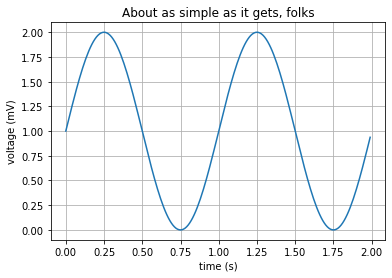

yes


In [1]:
%matplotlib inline

main :-
    python_import( matplotlib.pyplot  as plt ),
    python_import( numpy  as np ),
    T = np.arange(0.0, 2.0, 0.01),
    S = 1 + np.sin(2*np.pi*T),
    plt.plot(T, S),
    plt.xlabel(`time (s)`),
    plt.ylabel(`voltage (mV)`),
    plt.title(`About as simple as it gets, folks`),
    plt.grid(true),
    plt.show().

main 

% reconsulting $stream(3)...
% fmem consulted in module user, 1 msec 0 bytes
show '()'.


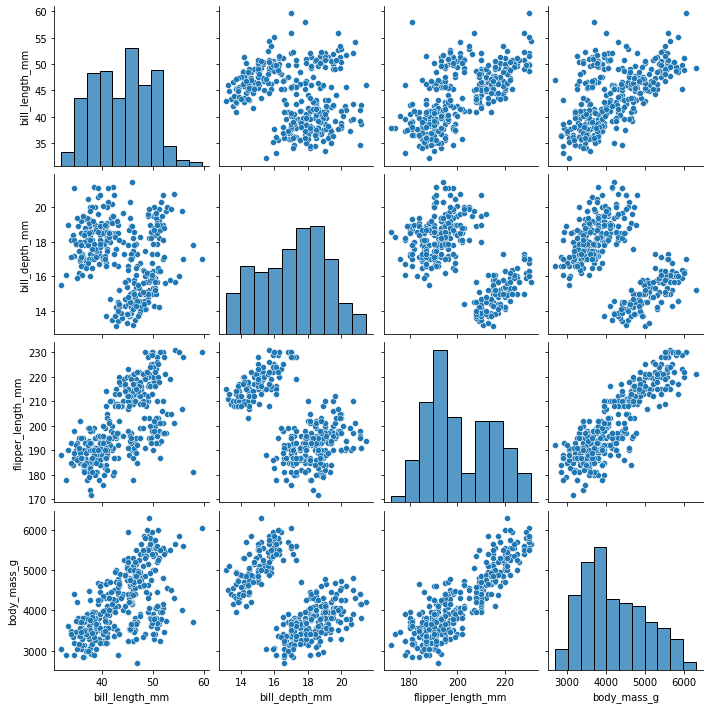

yes


In [1]:
%matplotlib inline

main2 :-
    python_import( seaborn as sns ),
python_import( matplotlib.pyplot as plt ),
 penguins := sns.load_dataset(`penguins`),
sns.pairplot(penguins),
plt.show().
main2

In [ ]:
m :-  penguins := sns.load_dataset(`penguins`),
sns.pairplot(penguins, hue=`species`), 
plt.show().

m.

In [2]:
:= print(penguins)

ERROR! Session/line number was not unique in database. History logging moved to new session 38
    species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0   

yes


In [11]:
X := penguins.species.to_list(), Y := penguins.body_mass_g.to_list().

to_list '()'.
to_list '()'.
X = ['Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Adelie','Ade

Last, Prolog can talk to R, so you can get a Python to R bridge

% reconsulting $stream(6)...
show '()'.


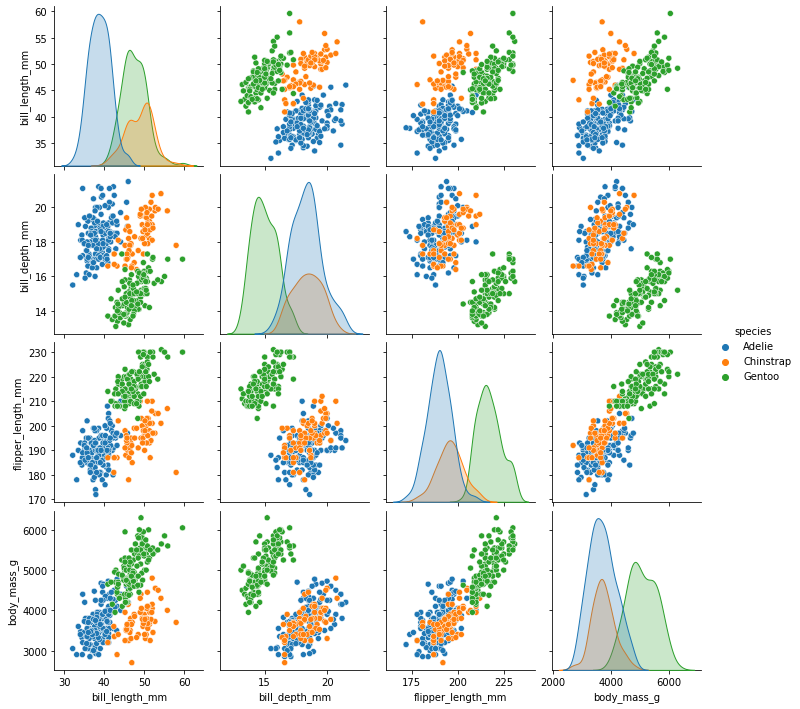

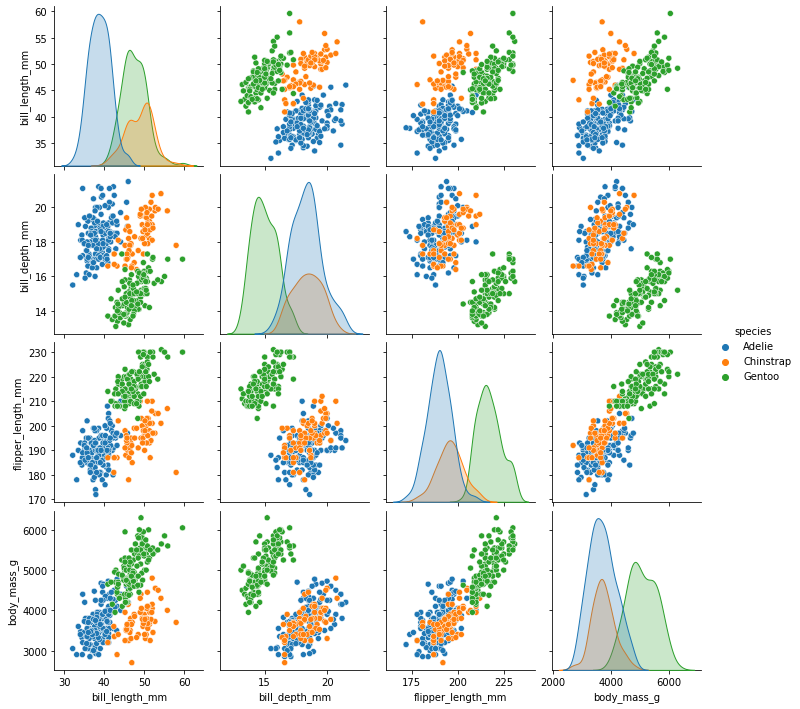

% fmem consulted in module user, 5817 msec 0 bytes
yes


In [5]:
:- (sns.pairplot(penguins, hue= `species`)), plt.show().

In [2]:
:- [library(real)].

X <- c(1:10), x := X

% reconsulting $stream(3)...
% consulting library(real)...
% /home/vsc/.local/share/Yap/real.pl consulted in module real, 76 msec 0 bytes
% fmem consulted in module user, 77 msec 0 bytes
X = [1,2,3,4,5,6,7,8,9,10].


ERROR! Session/line number was not unique in database. History logging moved to new session 23


get_code(C)

In [9]:

    get_code(C)

C = -1.


In [10]:

%%python3
import sys
input()

No



Illegal message Component: error(syntax_error([]),[errorMsg="bracket or operator expected.",culprit="[]",prologConsulting=false,parserReadingCode=false,parserFile="fmem",parserTextB= -2,parserTextA="import sys\ninput().",parserLastLine=4,parserFirstLine=2,parserLine=2,parserPos=9,prologPredFile="/home/vsc/.local/share/Yap/jupyter.yap",prologPredModule="jupyter",prologPredArity=2,prologPredName="jupyter_call",prologPredLine=122,errorFile="../os/readterm.c",errorFunction="syntax_error",errorLine=404,classAsText="syntax_error",errorAsText="syntax_error",errorClass=8,errorNo=100]) !!!.
